## Phase 1 Project 

### The Problem Statement
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

### The Business Questions
1. How have the number of aviation accidents changed over the years?
2. Which aircraft models are involved in the most incidents and are certain engine types associated with higher incident rates?
3. Are certain weather conditions more likely to result in severe injuries or fatalities?
4. What are the most common types of aircraft damage in accidents?

### Project Objectives

- Analyze accident trends to understand aviation risks over time.
- Determine the safest aircraft models and engine types.
- Evaluate the impact of weather conditions on aircraft safety.
- Assess aircraft damage patterns to identify durable and reliable models.

In understanding the `AviationData.csv`, necessary libraries are to be imported for proper data analysis and visualization.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The `AviationData.csv` file is then loaded to `aviation_df` through Pandas. The `encoding` parameter `latin-1` was called to ensure decoding of the file is done correctly to avoid crashing. The `low_memory` parameter `False` was called to be able to optimize memory usage and ensure consistent column data types.

In [2]:
# Loading the data to aviation_df and calling the first 5 rows
df = pd.read_csv('data/raw_data/AviationData.csv', encoding='latin-1', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Copying the dataframe into a new copy to be used for data cleaning.

In [3]:
aviation_df = df.copy()

In understanding the dataframe, `df.info()` is run to get the columns names, total entries, any missing values in the columns and the data types of the columns. Afterwards, `df.duplicated()` is run to find any duplicated values if any. `df.isna().sum()` is the applied to be able to find the count of missing values in the columns. 

In [4]:
# Inspecting the information of aviation_df
aviation_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [5]:
# Finding the shape of the dataframe
aviation_df.shape
print(f'The dataframe has {aviation_df.shape[0]} rows and {aviation_df.shape[1]} columns.')

The dataframe has 88889 rows and 31 columns.


In [6]:
# Summary statistics of numerical columns
aviation_df.describe() 

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [7]:
aviation_df.nunique() # Finding the number of unique values in each column

Event.Id                  87951
Investigation.Type            2
Accident.Number           88863
Event.Date                14782
Location                  27758
Country                     219
Latitude                  25589
Longitude                 27154
Airport.Code              10375
Airport.Name              24871
Injury.Severity             109
Aircraft.damage               4
Aircraft.Category            15
Registration.Number       79105
Make                       8237
Model                     12318
Amateur.Built                 2
Number.of.Engines             7
Engine.Type                  13
FAR.Description              31
Schedule                      3
Purpose.of.flight            26
Air.carrier               13590
Total.Fatal.Injuries        125
Total.Serious.Injuries       50
Total.Minor.Injuries         57
Total.Uninjured             379
Weather.Condition             4
Broad.phase.of.flight        12
Report.Status             17075
Publication.Date           2924
dtype: i

In [8]:
# Inspecting for duplicated values in the dataframe
aviation_df.duplicated().sum()
print(f'The document has {aviation_df.duplicated().sum()} duplicated values.')

The document has 0 duplicated values.


In [9]:
# Inspecting missing values from aviation_df 
aviation_df.isna().sum() 

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [10]:
# Checking the names of the dataframe's columns
aviation_df.columns   

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

#### Summary of the Dataset
- The dataset has 31 columns and 88889 rows. 
- The datatypes include objects and floats. 
- Just 4 columns do not have missing values i.e. `Event.Id`, `Investigation.Type`, `Accident.Number` and `Event.Date`

### Cleaning and Normalizing the Data

After identyfing the dataframe's information, shape, the names of the columns, the summary statistics of numerical columns, the data cleaning process commences. First, there are certain columns with many missing values and may not be of much help eventually in the analysis. These include `Latitude`, `Longitude`, `FAR.Description`, `Air.carrier`, `Aircraft.Category`, `Airport.Name`, `Airport.Code`, `Number.of.Engine`, `Registration.Number`, `Report.Status`, `Publication.Date` and `Schedule` columns. 

In [11]:
# Dropping the 'Latitude', 'Longitude', 'FAR.Description', 'Air.carrier', 'Aircraft.Category', and 'Schedule'columns
aviation_df = aviation_df.drop(['Latitude', 'Longitude', 'FAR.Description', 'Air.carrier', 'Aircraft.Category', 'Airport.Code', 'Airport.Name', 'Number.of.Engines', 'Registration.Number', 'Report.Status', 'Publication.Date', 'Schedule'], axis=1)

In [12]:
# Checking to see if the columns have been dropped.
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Injury.Severity         87889 non-null  object 
 7   Aircraft.damage         85695 non-null  object 
 8   Make                    88826 non-null  object 
 9   Model                   88797 non-null  object 
 10  Amateur.Built           88787 non-null  object 
 11  Engine.Type             81812 non-null  object 
 12  Purpose.of.flight       82697 non-null  object 
 13  Total.Fatal.Injuries    77488 non-null  float64
 14  Total.Serious.Injuries  76379 non-null

Some values in the `Make` column may have been entered differently but are the same. You can see from the above output, values such as `Boeing` and `BOEING` may just mean the same `Make`. In this case, we have to convert the column values to title case, the strip any whitespaces and then group them together. 

In [13]:
aviation_df['Make'] = aviation_df['Make'].str.title().str.strip()
aviation_df['Make'].value_counts().head(10)

Cessna      27149
Piper       14870
Beech        5372
Boeing       2745
Bell         2722
Mooney       1334
Robinson     1230
Grumman      1172
Bellanca     1045
Hughes        932
Name: Make, dtype: int64

In [14]:
# Replacing missing values in the columns with missing values
aviation_df['Total.Fatal.Injuries'].fillna(0, inplace = True)
aviation_df['Total.Serious.Injuries'].fillna(0, inplace = True)
aviation_df['Total.Minor.Injuries'].fillna(0, inplace = True)
aviation_df['Total.Uninjured'].fillna(0, inplace = True)
aviation_df['Broad.phase.of.flight'].fillna('Unknown',inplace = True)
aviation_df['Weather.Condition'].fillna('Unknown',inplace = True)
aviation_df['Aircraft.damage'].fillna('Unknown',inplace=True)
aviation_df['Engine.Type'].fillna('Unknown',inplace=True)
aviation_df['Purpose.of.flight'].fillna('Unknown',inplace=True) 
aviation_df['Amateur.Built'].fillna('Unknown',inplace=True)
aviation_df['Injury.Severity'].fillna('Unknown',inplace=True)
aviation_df['Location'].fillna('Unknown',inplace=True)
aviation_df['Country'].fillna('Unknown',inplace=True)
aviation_df['Make'].fillna(aviation_df['Make'].mode()[0], inplace=True)
aviation_df['Model'].fillna(aviation_df['Model'].mode()[0], inplace=True)

In [15]:
aviation_df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Amateur.Built             0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
dtype: int64

In [16]:
# Maintaining consistency in the `Weather.Condition' column 
aviation_df['Weather.Condition'].replace({'UNK': 'Unknown', 'Unk': 'Unknown'}, inplace=True)

In [17]:
# Maintaining consistency in the 'Engine.Type' column
aviation_df['Engine.Type'].replace({'UNK':'Unknown', 'None': 'Unknown', 'NONE': 'Unknown'}, inplace=True)


The aviation industry underwent significant changes in the 1980s, including advancements in technology, stricter safety regulations and improved reporting systems. This therefore warranted dropping data earlier than 1982. 

In [18]:
aviation_df = aviation_df[aviation_df['Event.Date'] >= '1982-01-01']

Among the columns is `Event.Date` column that its data type is an object. To be able to find the year and months of the event, best case is to convert the `Event.Date` column to a Datetime data type. There after, add new columns of `Month` and `Year`.  

In [19]:
# Converting the 'Event.Date' to datetime datatype
aviation_df['Event.Date'] = pd.to_datetime(aviation_df['Event.Date'])
aviation_df.info() # To check the dtype of 'Event.Date' column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88882 entries, 7 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88882 non-null  object        
 1   Investigation.Type      88882 non-null  object        
 2   Accident.Number         88882 non-null  object        
 3   Event.Date              88882 non-null  datetime64[ns]
 4   Location                88882 non-null  object        
 5   Country                 88882 non-null  object        
 6   Injury.Severity         88882 non-null  object        
 7   Aircraft.damage         88882 non-null  object        
 8   Make                    88882 non-null  object        
 9   Model                   88882 non-null  object        
 10  Amateur.Built           88882 non-null  object        
 11  Engine.Type             88882 non-null  object        
 12  Purpose.of.flight       88882 non-null  object

In [20]:
# Adding the 'Year' and 'Month' columns to the aviation_df
aviation_df['Year'] = aviation_df['Event.Date'].dt.year
aviation_df['Month'] = aviation_df['Event.Date'].dt.month_name()

In [21]:
aviation_df['Year'].head() # Checking to see if the 'Year' column has been added


7     1982
8     1982
9     1982
10    1982
11    1982
Name: Year, dtype: int64

In [22]:
aviation_df['Month'].head() # Checking to see if the 'Month' column has been added

7     January
8     January
9     January
10    January
11    January
Name: Month, dtype: object

In [23]:
# Adding 'Total_Injuries' column to sum all the injured i.e. 'Total.Fatal.Injuries', 'Total.Serious.Injuries' and 'Total.Minor.Injuries'
aviation_df['Total.Injuries'] = aviation_df['Total.Fatal.Injuries'] + aviation_df['Total.Serious.Injuries'] + aviation_df['Total.Minor.Injuries']
aviation_df.columns # Checking to see if the column has been added

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage', 'Make',
       'Model', 'Amateur.Built', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Year', 'Month', 'Total.Injuries'],
      dtype='object')

Looping through columns with numerical values to check for outliers. The columns include: `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, `Total.Injuries` and `Total.Uninjured`. 

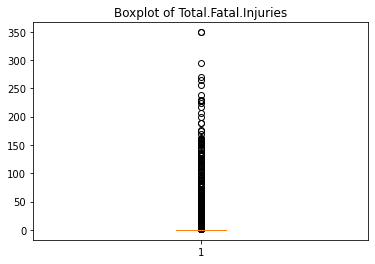

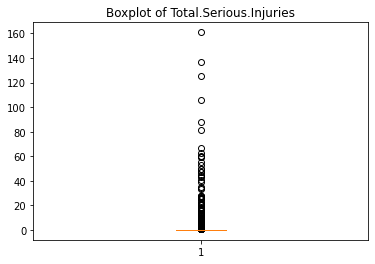

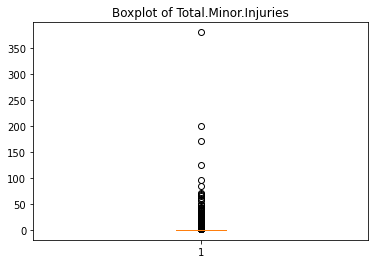

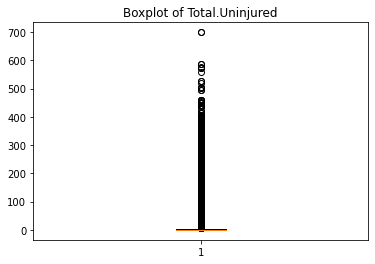

In [24]:
# List of columns to plot
columns_to_plot = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# Looping through each column and create a boxplot
for column in columns_to_plot:
    plt.boxplot(aviation_df[column])  # Create a boxplot for the current column
    plt.title(f'Boxplot of {column}')  # Set the title dynamically based on the column name
    plt.show()  # Display the plot

In [25]:
aviation_df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Amateur.Built             0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Year                      0
Month                     0
Total.Injuries            0
dtype: int64

In [26]:
aviation_df.to_csv('CleanedAviationData.csv', index=False)

### Data Visualization and Analysis

#### Objective #1 Analyze accident trends to understand aviation risks over time?

In this objective, there are visualizations of the accidents over the years and the accident trend per month. 

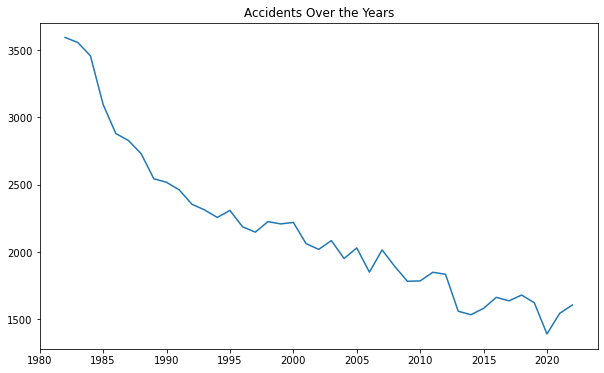

In [27]:
accidents_per_year = aviation_df['Year'].value_counts().sort_index()
accidents_per_year.plot(kind='line', figsize=(10, 6), title='Accidents Over the Years');

In the above visualization, there seems to be reduced number of accidents over the years leading up to 2020. 

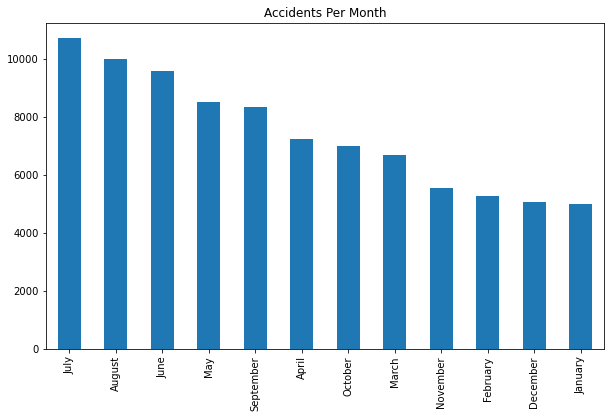

In [28]:
accidents_per_month = aviation_df['Month'].value_counts()
accidents_per_month.plot(kind='bar', figsize=(10, 6), title='Accidents Per Month');

In the above visualization, there appears to be more accidents in the month of July, August and June (which could be summer months in the United States).

#### Objective #2 Determine the safest aircraft makes, models and the engine types.

In this objective, there are visualizations for aircraft makes, models and the number of incidents. Moreover, engine types in the aircraft are investigated to determine the number of incidents.

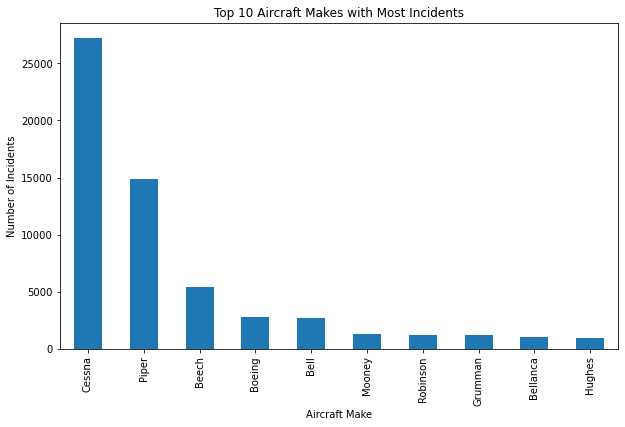

In [29]:
# Top 10 aircraft models with the most incidents
top_models = aviation_df['Make'].value_counts().head(10)
top_models.plot(kind='bar', figsize=(10, 6), title='Top 10 Aircraft Makes with Most Incidents')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Incidents')
plt.show();

In the above visualization, the Cessna make had incidents by almost twice as much as the second make, Piper. 

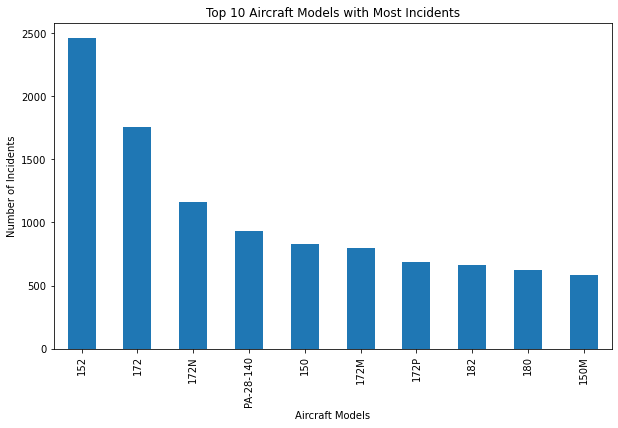

In [30]:
# Top 10 aircraft models with the most incidents
top_models = aviation_df['Model'].value_counts().head(10)
top_models.plot(kind='bar', figsize=(10, 6), title='Top 10 Aircraft Models with Most Incidents')
plt.xlabel('Aircraft Models')
plt.ylabel('Number of Incidents')
plt.show();

In the above visualization, the aircraft model '152' has the most incidents. 

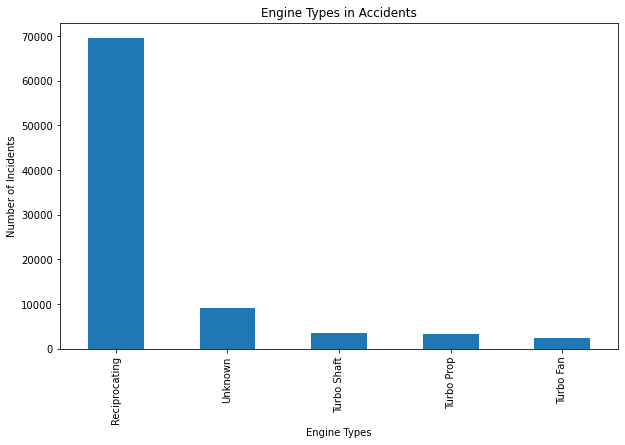

In [31]:
# Bar chart for engine types
aviation_df['Engine.Type'].value_counts().head().plot(kind='bar', figsize=(10, 6), title='Engine Types in Accidents')
plt.xlabel('Engine Types')
plt.ylabel('Number of Incidents')
plt.show();

In the above visualization, most of the incidents that occured were with aircraft with the reciprocating engine type. 

#### Objective #3 Evaluate the impact of weather conditions on aircraft safety. 

In understanding the different weather conditions in the aviation dataset, VMC in full is Visual Meteorological Conditions where the pilot can be able to maintain visual separation from the terrain and other aircraft where as IMC in full is Instrument Meteorological Conditions where the pilot relies on the aircrafts instruments for navigation and flight control. 

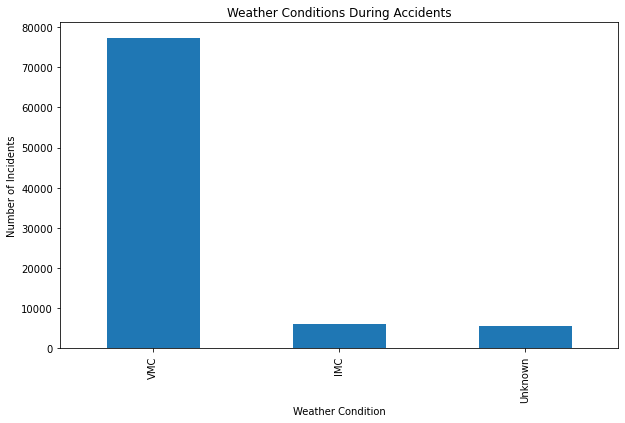

In [32]:
# Bar chart for weather conditions
aviation_df['Weather.Condition'].value_counts().plot(kind='bar', figsize=(10, 6), title='Weather Conditions During Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Incidents')
plt.show();

In the above visualization, it is alarming that most of the accidents happened when the pilot was able to see the terrain and other aircraft, meaning the weather conditions were not as dire compared to when they would necessarily have to rely on the computers of the aircraft. 

#### Objective #4 Assessing aircraft damage patterns to identify durable and reliable models.

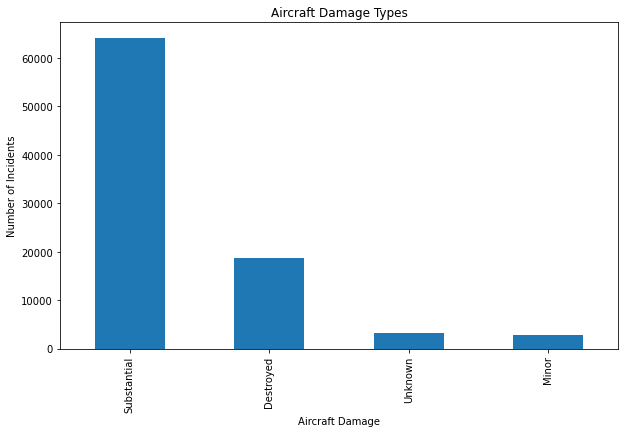

In [33]:
# Bar chart for aircraft damage
aviation_df['Aircraft.damage'].value_counts().plot(kind='bar', figsize=(10, 6), title='Aircraft Damage Types')
plt.xlabel('Aircraft Damage')
plt.ylabel('Number of Incidents')
plt.show(); 

In the visualization above, most of the accidents had substantial damage on the aircraft. 

## Findings

### Objective 1: Analyze Accident Trends Over Time

Yearly Trends

- There was a decline in the number of accidents over the years which may be due to improvements in the aviation safety measures and procedures or advancements in technology

Monthly Trends

- Certain months may have had higher accident rates possibly due to the seasons for example the summer seasons in June, July and August months. 
- Months with fewer accidents may indicate periods of reduced air traffic or favorable weather conditions. 

### Objective 2: Identify Aircraft Models with the most Incidents

Aircraft Makes 
- Particular makes may have had a higher rate of accidents which could be due to their regular use and popularity.

Aircraft Models
- Certain models may have significantly higher incident rates which could be due to their popularity or design issues.
- Models with fewer incidents may indicate better safety records or less frequent use.

Engine Types
- Specific engine types may be associated with higher incident rates possibly due to mechanical sophistication, maintenance problems or certain operational conditions.
- Engine types with fewer incidents may indicate better realibility or suitability for certain conditions.

### Objective 3: Investigate the Impact of Weather Conditions 


Weather Conditions
- A large proportion of accidents occuring under clear weather conditions may suggest that human error or mechanical failure is a significant factor.
- Higher accident rates under adverse weather conditions may highlight the need for better weather forecasting, pilot training or equipment upgrades. 

### Objective 4: Analyze Aircraft Damage Patterns

Types of Damage
- Certain types of damage e.g. 'Destroyed' dominatig the dataset may indicate the severity of many incidents.
- Less severe damage e.g. 'Substantial' may suggest incidents where safety measures or emergency responses were effective in minimizing harm. 

## Recommendations

- The business should focus on low-risk aircraft models with the lowest incident rates and have a history of reliabity. They should consider avoiding models with high incident rates unless there are mitigation strategies in place. These would reduce operational risks and build trust with clients by prioritizing safer aircraft models.

- The business should consider focusing on engine types with low incident rates and can be reliable and should implement predictive maintenance systems to monitor engine performance and prevent failures. These would minimize downtime and maintenance costs while ensuring operational safety and reliability. 

- The business should choose aircraft equipped with advanced weather detection systems and avionics to handle adverse weather conditions effectively. This would reduce weather-related risks and ensure safer operations in diverse environmental conditions. 

- The business should consider investing in aircraft with advanced safety features e.g. fire suppression systems and effective evacuation mechanisms. This would improve passenger safety and reduce the likelihood of catastrophic losses in the event of an incident. 

## Conclusions

- The business should consider prioritizing low-risk aircraft models as they are the safest options for the business to invest in.

- The business should emphasize reliable engine types as they are critical for ensuring operational safety and minimizing maintenance costs.

- The business should consider investing in weather-resilient aircraft and training pilots to handle challenging conditions to reduce weather-related risks and ensure safer operations.

- The business should consider investing in advanced safety features like fire suppression systems and effective evacuation mechanisms better equipped to handle emergencies. 